In [7]:
from geopy.distance import geodesic
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [20]:
#define a variable Link1 that contains a URL to an API endpoint for extracting daily air quality data for Barnstable county in Massachusetts, USA, for ozone from January to December 2018.
Link1 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=001"

In [21]:
#Parses the response content as JSON using the json() method of the response object, and assigns the resulting JSON data to a variable json_data1.
r1=requests.get(url=Link1)
json_data1=r1.json()
json_data1

{'Header': [{'status': 'Success',
   'request_time': '2023-05-15T01:09:03-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=001',
   'rows': 1448}],
 'Data': [{'state_code': '25',
   'county_code': '001',
   'site_number': '0002',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 41.975804,
   'longitude': -70.023598,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2016-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.029792,
   'first_max_value': 0.033,
   'first_max_hour': 15,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name':

In [22]:
#We write the contents of the CSV file "output.csv" into a pandas DataFrame named df1.
df1 = pd.json_normalize(json_data1["Data"])
df1.to_csv("output.csv", index=False)
df1

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1443         25         001        0002          44201    1  41.975804   
1444         25         001        0002          44201    1  41.975804   
1445         25         001        0002          44201    1  41.975804   
1446         25         001        0002          44201    1  41.975804   
1447         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    W  ...         087   
4    -70.023598  WGS84     Ozone                    1  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1443 -70.023598  WGS84     Ozone                    W  ...         087   
1444 -70.023598  WGS84     Ozone                    1  ...         087   
1445 -70.023598  WGS84     Ozone                    W  ...         087   
1446 -70.023598  WGS84     Ozone                    W  ...         087   
1447 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1443  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1444  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1445  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1446  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1447  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1443  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1444  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1445  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1446  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1447  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-10  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2023-02-05  
4     Barnstable Town, MA           2021-11-10  
...                   ...                  ...  
1443  Barnstable Town, MA           2023-02-05  
1444  Barnstable Town, MA           2021-11-10  
1445  Barnstable Town, MA           2023-02-05  
1446  Barnstable Town, MA      

In [23]:
# Create a new dataframe with the two variables date_local and arithmentic mean. 
new_df1=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df1

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-01         0.031412
4     2016-01-02         0.033261
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2017

In [24]:
Link2 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20170101&edate=20171231&state=25&county=001"

In [25]:
r2=requests.get(url=Link2)

In [26]:
json_data2=r2.json()
json_data2

{'Header': [{'status': 'Success',
   'request_time': '2023-05-15T01:09:05-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20170101&edate=20171231&state=25&county=001',
   'rows': 1419}],
 'Data': [{'state_code': '25',
   'county_code': '001',
   'site_number': '0002',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 41.975804,
   'longitude': -70.023598,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2017-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.034667,
   'first_max_value': 0.042,
   'first_max_hour': 0,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name': 

In [27]:
df2 = pd.json_normalize(json_data2["Data"])
df2.to_csv("output.csv", index=False)
df2

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1414         25         001        0002          44201    1  41.975804   
1415         25         001        0002          44201    1  41.975804   
1416         25         001        0002          44201    1  41.975804   
1417         25         001        0002          44201    1  41.975804   
1418         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    W  ...         087   
4    -70.023598  WGS84     Ozone                    1  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1414 -70.023598  WGS84     Ozone                    W  ...         087   
1415 -70.023598  WGS84     Ozone                    1  ...         087   
1416 -70.023598  WGS84     Ozone                    W  ...         087   
1417 -70.023598  WGS84     Ozone                    W  ...         087   
1418 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1414  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1415  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1416  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1417  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1418  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1414  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1415  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1416  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1417  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1418  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-07  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2023-02-05  
4     Barnstable Town, MA           2021-11-07  
...                   ...                  ...  
1414  Barnstable Town, MA           2023-02-05  
1415  Barnstable Town, MA           2021-11-07  
1416  Barnstable Town, MA           2023-02-05  
1417  Barnstable Town, MA      

In [28]:
new_df2=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df2

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-01         0.031412
4     2016-01-02         0.033261
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2018

In [29]:
Link3 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20180101&edate=20181231&state=25&county=001"

In [30]:
r3=requests.get(url=Link3)

In [31]:
json_data3= r3.json()
json_data3

{'Header': [{'status': 'Success',
   'request_time': '2023-05-15T01:09:08-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20180101&edate=20181231&state=25&county=001',
   'rows': 1451}],
 'Data': [{'state_code': '25',
   'county_code': '001',
   'site_number': '0002',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 41.975804,
   'longitude': -70.023598,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2018-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.037833,
   'first_max_value': 0.041,
   'first_max_hour': 16,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name':

In [32]:
df3 = pd.json_normalize(json_data3["Data"])
df3.to_csv("output.csv", index=False)
df3

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1446         25         001        0002          44201    1  41.975804   
1447         25         001        0002          44201    1  41.975804   
1448         25         001        0002          44201    1  41.975804   
1449         25         001        0002          44201    1  41.975804   
1450         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    W  ...         087   
4    -70.023598  WGS84     Ozone                    1  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1446 -70.023598  WGS84     Ozone                    W  ...         087   
1447 -70.023598  WGS84     Ozone                    1  ...         087   
1448 -70.023598  WGS84     Ozone                    W  ...         087   
1449 -70.023598  WGS84     Ozone                    W  ...         087   
1450 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1446  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1447  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1448  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1449  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1450  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1446  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1447  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1448  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1449  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1450  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-04  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2023-02-05  
4     Barnstable Town, MA           2021-11-04  
...                   ...                  ...  
1446  Barnstable Town, MA           2023-02-05  
1447  Barnstable Town, MA           2021-11-04  
1448  Barnstable Town, MA           2023-02-05  
1449  Barnstable Town, MA      

In [33]:
new_df3=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df3

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-01         0.031412
4     2016-01-02         0.033261
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2019

In [34]:
Link4 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20190101&edate=20191231&state=25&county=001"

In [35]:
r4=requests.get(url=Link4)

In [36]:
json_data4=r4.json()

In [37]:
df4 = pd.json_normalize(json_data4["Data"])
df4.to_csv("output.csv", index=False)
df4

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1435         25         001        0002          44201    1  41.975804   
1436         25         001        0002          44201    1  41.975804   
1437         25         001        0002          44201    1  41.975804   
1438         25         001        0002          44201    1  41.975804   
1439         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    1  ...         087   
4    -70.023598  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1435 -70.023598  WGS84     Ozone                    W  ...         087   
1436 -70.023598  WGS84     Ozone                    W  ...         087   
1437 -70.023598  WGS84     Ozone                    W  ...         087   
1438 -70.023598  WGS84     Ozone                    W  ...         087   
1439 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1435  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1436  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1437  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1438  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1439  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1435  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1436  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1437  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1438  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1439  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-01  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2021-11-01  
4     Barnstable Town, MA           2023-02-05  
...                   ...                  ...  
1435  Barnstable Town, MA           2023-02-05  
1436  Barnstable Town, MA           2023-02-05  
1437  Barnstable Town, MA           2023-02-05  
1438  Barnstable Town, MA      

In [38]:
new_df4=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df4

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-01         0.031412
4     2016-01-02         0.033261
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2020

In [39]:
Link5 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20200101&edate=20201231&state=25&county=001"

In [40]:
r5=requests.get(url=Link5)

In [41]:
r5.json()
json_data5 =r5.json()

In [42]:
df5 = pd.json_normalize(json_data5["Data"])
df5.to_csv("output.csv", index=False)
df5

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1402         25         001        0002          44201    1  41.975804   
1403         25         001        0002          44201    1  41.975804   
1404         25         001        0002          44201    1  41.975804   
1405         25         001        0002          44201    1  41.975804   
1406         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    1  ...         087   
4    -70.023598  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1402 -70.023598  WGS84     Ozone                    W  ...         087   
1403 -70.023598  WGS84     Ozone                    1  ...         087   
1404 -70.023598  WGS84     Ozone                    W  ...         087   
1405 -70.023598  WGS84     Ozone                    W  ...         087   
1406 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1402  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1403  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1404  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1405  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1406  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1402  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1403  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1404  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1405  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1406  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-10-31  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2021-10-31  
4     Barnstable Town, MA           2023-02-05  
...                   ...                  ...  
1402  Barnstable Town, MA           2023-02-05  
1403  Barnstable Town, MA           2021-10-31  
1404  Barnstable Town, MA           2023-02-05  
1405  Barnstable Town, MA      

In [43]:
new_df5=df5.loc[:,["date_local", "arithmetic_mean"]]
new_df5

date_local  arithmetic_mean
0     2020-01-01         0.026500
1     2020-01-01         0.027375
2     2020-01-01         0.027375
3     2020-01-02         0.033783
4     2020-01-02         0.033917
...          ...              ...
1402  2020-12-30         0.037412
1403  2020-12-31         0.032500
1404  2020-12-31         0.030684
1405  2020-12-31         0.030684
1406  2020-12-31         0.027583

[1407 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2021

In [44]:
Link6 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20210101&edate=20211231&state=25&county=001"

In [45]:
r6=requests.get(url=Link6)

In [46]:
json_data6=r6.json()

In [285]:
df6 = pd.json_normalize(json_data6["Data"])
df6.to_csv("output.csv", index=False)
df6

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1440         25         001        0002          44201    1  41.975804   
1441         25         001        0002          44201    1  41.975804   
1442         25         001        0002          44201    1  41.975804   
1443         25         001        0002          44201    1  41.975804   
1444         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    W  ...         087   
4    -70.023598  WGS84     Ozone                    1  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1440 -70.023598  WGS84     Ozone                    W  ...         087   
1441 -70.023598  WGS84     Ozone                    1  ...         087   
1442 -70.023598  WGS84     Ozone                    W  ...         087   
1443 -70.023598  WGS84     Ozone                    W  ...         087   
1444 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1440  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1441  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1442  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1443  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1444  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1440  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1441  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1442  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1443  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1444  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2022-03-24  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2023-02-05  
4     Barnstable Town, MA           2022-03-24  
...                   ...                  ...  
1440  Barnstable Town, MA           2023-02-05  
1441  Barnstable Town, MA           2022-03-24  
1442  Barnstable Town, MA           2023-02-05  
1443  Barnstable Town, MA      

In [286]:
new_df6=df6.loc[:,["date_local", "arithmetic_mean"]]
new_df6

date_local  arithmetic_mean
0     2021-01-01         0.032083
1     2021-01-01         0.032750
2     2021-01-01         0.032750
3     2021-01-01         0.033706
4     2021-01-02         0.034043
...          ...              ...
1440  2021-12-30         0.020176
1441  2021-12-31         0.013261
1442  2021-12-31         0.013053
1443  2021-12-31         0.013053
1444  2021-12-31         0.013833

[1445 rows x 2 columns]

In [287]:
Link7 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20220101&edate=20220831&state=25&county=001"

Repeat the same process for ozone data in Barnstable county during 2022

In [288]:
r7=requests.get(url=Link7)

In [289]:
json_data7=r7.json()

In [290]:
df7 = pd.json_normalize(json_data7["Data"])
df7.to_csv("output.csv", index=False)
df7

state_code county_code site_number parameter_code  poc   latitude  \
0           25         001        0002          44201    1  41.975804   
1           25         001        0002          44201    1  41.975804   
2           25         001        0002          44201    1  41.975804   
3           25         001        0002          44201    1  41.975804   
4           25         001        0002          44201    1  41.975804   
..         ...         ...         ...            ...  ...        ...   
956         25         001        0002          44201    1  41.975804   
957         25         001        0002          44201    1  41.975804   
958         25         001        0002          44201    1  41.975804   
959         25         001        0002          44201    1  41.975804   
960         25         001        0002          44201    1  41.975804   

     longitude  datum parameter sample_duration_code  ... method_code  \
0   -70.023598  WGS84     Ozone                    1  ...         087   
1   -70.023598  WGS84     Ozone                    W  ...         087   
2   -70.023598  WGS84     Ozone                    W  ...         087   
3   -70.023598  WGS84     Ozone                    1  ...         087   
4   -70.023598  WGS84     Ozone                    W  ...         087   
..         ...    ...       ...                  ...  ...         ...   
956 -70.023598  WGS84     Ozone                    1  ...         087   
957 -70.023598  WGS84     Ozone                    1  ...         087   
958 -70.023598  WGS84     Ozone                    W  ...         087   
959 -70.023598  WGS84     Ozone                    W  ...         087   
960 -70.023598  WGS84     Ozone                    W  ...         087   

                                     method          local_site_name  \
0    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
..                                      ...                      ...   
956  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
957  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
958  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
959  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
960  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

        site_address          state      county   city cbsa_code  \
0    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
..               ...            ...         ...    ...       ...   
956  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
957  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
958  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
959  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
960  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                    cbsa  date_of_last_change  
0    Barnstable Town, MA           2023-03-02  
1    Barnstable Town, MA           2023-03-02  
2    Barnstable Town, MA           2023-03-02  
3    Barnstable Town, MA           2023-03-02  
4    Barnstable Town, MA           2023-03-02  
..                   ...                  ...  
956  Barnstable Town, MA           2023-03-02  
957  Barnstable Town, MA           2023-03-02  
958  Barnstable Town, MA           2023-03-02  
959  Barnstable Town, MA           2023-03-02  
960  Barnstable Town, MA           2023-

In [291]:
new_df7=df7.loc[:,["date_local", "arithmetic_mean"]]
new_df7

date_local  arithmetic_mean
0    2022-01-01         0.029542
1    2022-01-01         0.028667
2    2022-01-01         0.028667
3    2022-01-02         0.018500
4    2022-01-02         0.019083
..          ...              ...
956  2022-08-28         0.029667
957  2022-08-31         0.039727
958  2022-08-31         0.033846
959  2022-08-31         0.033846
960  2022-08-31         0.033846

[961 rows x 2 columns]

Concatenate the data frames in order to create an ozone dataset for Barnstable county from 2016 up to 2022. 

In [292]:
result = pd.concat([new_df1, new_df2, new_df3, new_df4, new_df5, new_df6, new_df7])

In [293]:
result

date_local  arithmetic_mean
0    2016-01-01         0.029792
1    2016-01-01         0.030500
2    2016-01-01         0.030500
3    2016-01-02         0.033261
4    2016-01-02         0.032375
..          ...              ...
956  2022-08-28         0.029667
957  2022-08-31         0.039727
958  2022-08-31         0.033846
959  2022-08-31         0.033846
960  2022-08-31         0.033846

[9605 rows x 2 columns]

Create a scatter plot with time series data using the result dataframe. 

In [294]:
x = result['date_local']
y = result['arithmetic_mean']

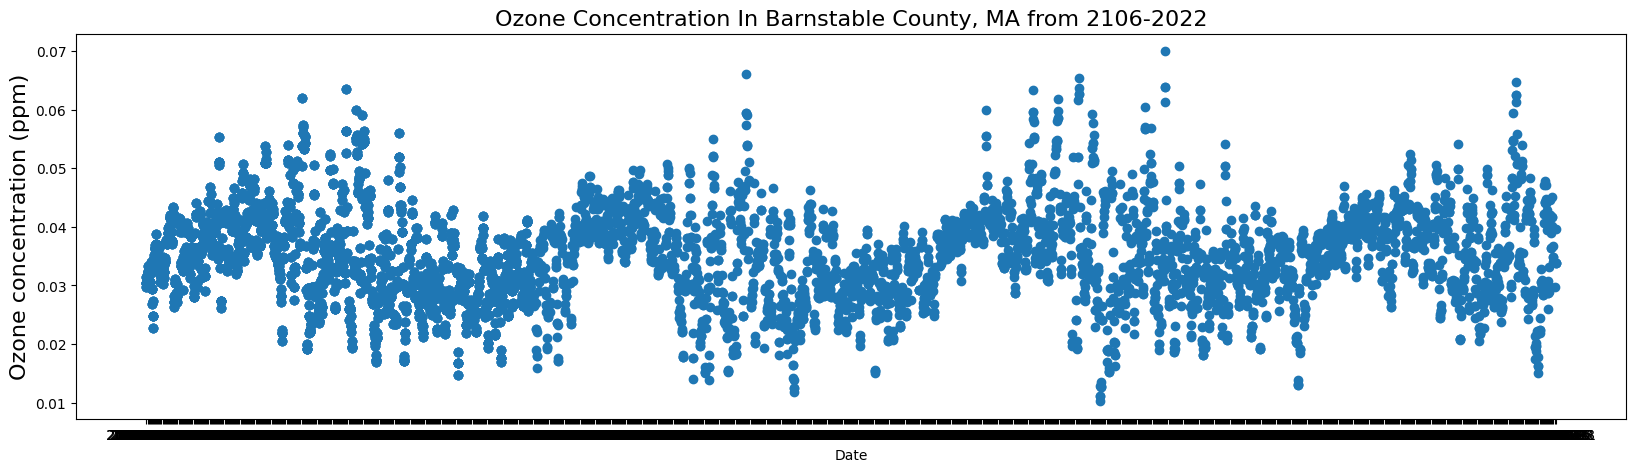

In [295]:
fig=plt.figure()
plt.close(fig)
plt.figure(figsize = (20,5))
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)', fontsize=16)
plt.title('Ozone Concentration In Barnstable County, MA from 2106-2022', fontsize=16)
plt.scatter(x, y)

In [296]:
#Create a new dataframe with the mean ozone value for every date. 
new_result=result.loc[:,["date_local", "arithmetic_mean"]]
new_result

date_local  arithmetic_mean
0    2016-01-01         0.029792
1    2016-01-01         0.030500
2    2016-01-01         0.030500
3    2016-01-02         0.033261
4    2016-01-02         0.032375
..          ...              ...
956  2022-08-28         0.029667
957  2022-08-31         0.039727
958  2022-08-31         0.033846
959  2022-08-31         0.033846
960  2022-08-31         0.033846

[9605 rows x 2 columns]

In [297]:
result_mean = new_result.groupby("date_local")["arithmetic_mean"].mean()
result_mean.to_csv('result_mean.csv')
df = pd.read_csv('result_mean.csv').reset_index()
df

index  date_local  arithmetic_mean
0         0  2016-01-01         0.030551
1         1  2016-01-02         0.032606
2         2  2016-01-03         0.030009
3         3  2016-01-04         0.030737
4         4  2016-01-05         0.033828
...     ...         ...              ...
1314   1314  2022-08-25         0.037788
1315   1315  2022-08-26         0.042154
1316   1316  2022-08-27         0.035142
1317   1317  2022-08-28         0.029667
1318   1318  2022-08-31         0.035316

[1319 rows x 3 columns]

In [17]:
new_df=df.loc[:,["index", "arithmetic_mean"]]
new_df

NameError: name 'df' is not defined

Create a scatter plot with time series data using the df dataframe. 

In [16]:
x = df['date_local']
y = df['arithmetic_mean']

NameError: name 'new_df' is not defined

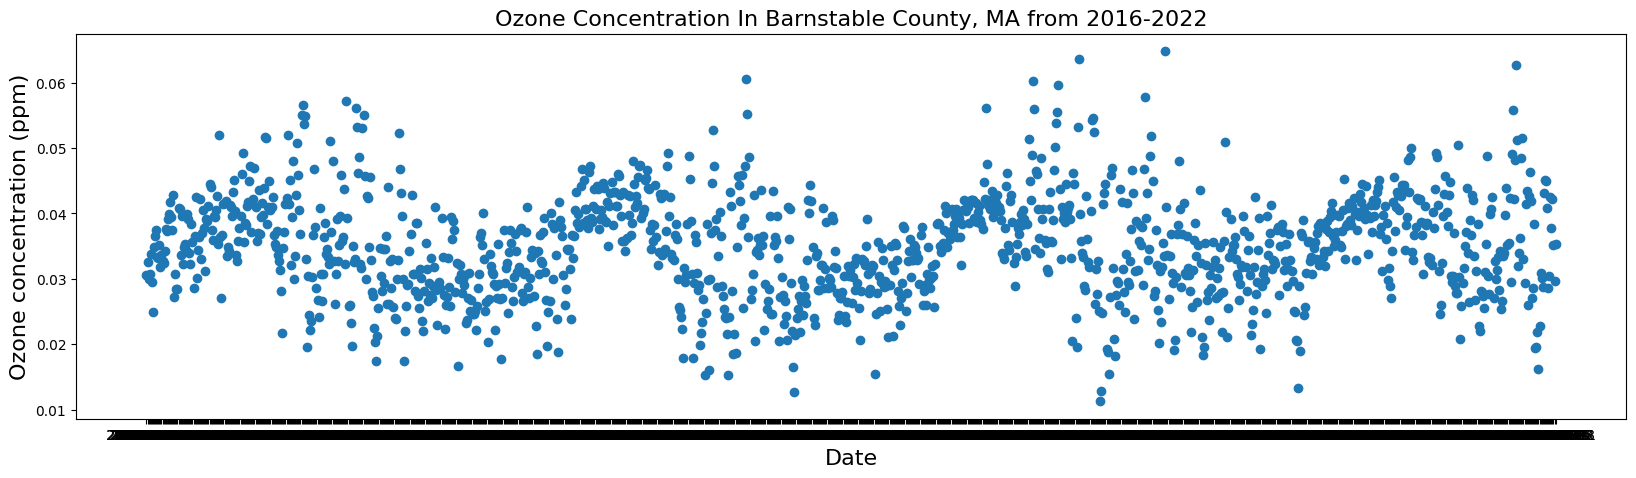

In [300]:
fig=plt.figure()
plt.close(fig)
plt.figure(figsize = (20,5))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ozone concentration (ppm)', fontsize=16)
plt.title('Ozone Concentration In Barnstable County, MA from 2016-2022', fontsize=16)
plt.scatter(x, y)

Run ARIMA model for the new_df dataframe and forecast data using the ARIMA model (0,0,30) 

In [320]:
model = ARIMA(new_df["arithmetic_mean"], order=(0, 0, 30))
model_fit = model.fit()

print(model_fit.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        arithmetic_mean   No. Observations:                 1319
Model:                ARIMA(0, 0, 30)   Log Likelihood                4851.603
Date:                Tue, 09 May 2023   AIC                          -9639.207
Time:                        14:24:55   BIC                          -9473.299
Sample:                    01-01-1970   HQIC                         -9577.002
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.001     52.703      0.000       0.034       0.036
ma.L1          0.6026      0.025     24.476      0.000       0.554       0.651
ma.L2          0.2387      0.029      8.249      0.0

Run ARIMA model for the new_df dataframe and forecast data using the ARIMA model (1,2,1) 

In [316]:
model2 = ARIMA(new_df["arithmetic_mean"], order=(1, 2, 1))
model_fit2 = model2.fit()

print(model_fit2.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        arithmetic_mean   No. Observations:                 1319
Model:                 ARIMA(1, 2, 1)   Log Likelihood                4671.183
Date:                Tue, 09 May 2023   AIC                          -9336.365
Time:                        14:23:40   BIC                          -9320.816
Sample:                    01-01-1970   HQIC                         -9330.535
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1643      0.024     -6.851      0.000      -0.211      -0.117
ma.L1         -0.9999      1.043     -0.959      0.338      -3.044       1.044
sigma2      4.823e-05   5.03e-05      0.958      0.3

Run ARIMA model for the new_df dataframe and forecast data using the ARIMA model (1,0,0) 

In [18]:
model3 = ARIMA(new_df["arithmetic_mean"], order=(1, 0, 0))
model_fit3 = model3.fit()

print(model_fit3.summary())

NameError: name 'new_df' is not defined

Forecast data using the third ARIMA model. 

In [310]:
forecast = model_fit3.forecast(steps=1000) 
print(forecast)

1970-01-01 00:00:00.000001319    0.035164
1970-01-01 00:00:00.000001320    0.035074
1970-01-01 00:00:00.000001321    0.035020
1970-01-01 00:00:00.000001322    0.034988
1970-01-01 00:00:00.000001323    0.034969
                                   ...   
1970-01-01 00:00:00.000002314    0.034941
1970-01-01 00:00:00.000002315    0.034941
1970-01-01 00:00:00.000002316    0.034941
1970-01-01 00:00:00.000002317    0.034941
1970-01-01 00:00:00.000002318    0.034941
Freq: N, Name: predicted_mean, Length: 1000, dtype: float64


Run an ACF plot for the new_df dataframe. 

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(new_df, ax=ax[0], lags=50)
plot_pacf(new_df, ax=ax[1], lags=50)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sm.graphics.tsa.plot_acf(new_df, ax=ax, lags=30, alpha=0.05)

# Analyze ACF plot
lags, acf, confint = sm.tsa.acf(new_df, nlags=30, alpha=0.05)
for lag, c, ci_lower, ci_upper in zip(lags, acf, confint[:, 0], confint[:, 1]):
    if c > ci_upper or c < ci_lower:
        print(f"Lag {int(lag)} has a significant correlation coefficient of {c:.3f} (CI {ci_lower:.3f} - {ci_upper:.3f})")

Repeat the same process for ozone data in Norfolk county during 2016.

In [ ]:
Q1 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=017"

In [ ]:
r1=requests.get(url=Q1)
json_data1=r1.json()
json_data1

In [235]:
df10 = pd.json_normalize(json_data1["Data"])
df10.to_csv("output.csv", index=False)
df10

state_code county_code site_number parameter_code  poc  latitude  \
0            25         017        0009          44201    1  42.62668   
1            25         017        0009          44201    1  42.62668   
2            25         017        0009          44201    1  42.62668   
3            25         017        0009          44201    1  42.62668   
4            25         017        0009          44201    1  42.62668   
...         ...         ...         ...            ...  ...       ...   
1458         25         017        0009          44201    1  42.62668   
1459         25         017        0009          44201    1  42.62668   
1460         25         017        0009          44201    1  42.62668   
1461         25         017        0009          44201    1  42.62668   
1462         25         017        0009          44201    1  42.62668   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -71.362068  WGS84     Ozone                    1  ...         087   
1    -71.362068  WGS84     Ozone                    W  ...         087   
2    -71.362068  WGS84     Ozone                    W  ...         087   
3    -71.362068  WGS84     Ozone                    1  ...         087   
4    -71.362068  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1458 -71.362068  WGS84     Ozone                    W  ...         087   
1459 -71.362068  WGS84     Ozone                    1  ...         087   
1460 -71.362068  WGS84     Ozone                    W  ...         087   
1461 -71.362068  WGS84     Ozone                    W  ...         087   
1462 -71.362068  WGS84     Ozone                    W  ...         087   

                                      method     local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
...                                      ...                 ...   
1458  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1459  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1460  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1461  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1462  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   

                                           site_address          state  \
0     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
2     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
3     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
4     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
...                                                 ...            ...   
1458  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1459  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1460  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1461  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1462  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   

         county                            city cbsa_code  \
0     Middlesex  Chelmsford (Chelmsford Center)     14460   
1     Middlesex  Chelmsford (Chelmsford Center)     14460   
2     Middlesex  Chelmsford (Chelmsford Center)     14460   
3     Middlesex  Chelmsford (Chelmsford Center)     14460   
4     Middlesex  Chelmsford (Chelmsford Center)     14460   
...         ...                             ...       ...   
1458  Middlesex  Chelmsford (Chelmsford Center)     14460   
1459  Middlesex  Chelmsford (Chelmsford Cente

In [236]:
new_df10=df10.loc[:,["date_local", "arithmetic_mean"]]
new_df10

date_local  arithmetic_mean
0     2016-01-01         0.028625
1     2016-01-01         0.029375
2     2016-01-01         0.029375
3     2016-01-02         0.031087
4     2016-01-02         0.029833
...          ...              ...
1458  2016-12-30         0.032824
1459  2016-12-31         0.029083
1460  2016-12-31         0.027684
1461  2016-12-31         0.027684
1462  2016-12-31         0.029250

[1463 rows x 2 columns]

Write the geographical coordinates of all observation centers in Massachussetts. Find the geodesic distance between the first observation center and all the other ones. 

In [55]:
#1 horizontal
#1. Barnstable County
lat1 = 41.975804
lon1 = -70.023598
# 2.Berkshire County
lat2 = 42.452299
lon2 = -73.239648
# 3. Bristol County
lat3 = 41.685707
lon3 = -71.169235
# 4. Dukes County
lat4 = 41.330469
lon4 = -70.785225
# 5. Essex County
lat5 = 42.474642
lon5 = -70.970816
# 6. Franklin County
lat6 =  42.605816
lon6 = -72.596689
# 7. Hampden County
lat7 = 42.19438
lon7 = -72.555112
# 8. Hampshire County
lat8 = 42.298493
lon8 = -72.334079
# 9. Middlesex County
lat9 = 42.612085
lon9 = -71.306986
# 10. Nantucket County
lat10 = 41.255824
lon10 = -72.334079
# 11. Norfolk County
lat11 = 42.211774
lon11 = -71.11397
# 12. Plymouth County
lat12 = 42.065106
lon12 = -71.012129
# Suffolk County
lat13 = 42.298493
lon13 = -71.0826
# Worcester County
lat14 = 42.274319
lon14 = -71.875511
distance0 = geodesic((lat1, lon1), (lat1, lon1)).km
distance1 = geodesic((lat1, lon1), (lat2, lon2)).km
distance2 = geodesic((lat1, lon1), (lat3, lon3)).km
distance3 = geodesic((lat1, lon1), (lat4, lon4)).km
distance4 = geodesic((lat1, lon1), (lat5, lon5)).km
distance5 = geodesic((lat1, lon1), (lat6, lon6)).km
distance6 = geodesic((lat1, lon1), (lat7, lon7)).km
distance7 = geodesic((lat1, lon1), (lat8, lon8)).km
distance8 = geodesic((lat1, lon1), (lat9, lon9)).km
distance9 = geodesic((lat1, lon1), (lat10, lon10)).km
distance10 = geodesic((lat1, lon1), (lat11, lon11)).km
distance11 = geodesic((lat1, lon1), (lat12, lon12)).km
distance12 = geodesic((lat1, lon1), (lat13, lon13)).km
distance13 = geodesic((lat1, lon1), (lat14, lon14)).km
print(distance0)
print(distance1) 
print(distance2)
print(distance3) 
print(distance4) 
print(distance5)
print(distance6)
print(distance7) 
print(distance8) 
print(distance9)
print(distance10)
print(distance11)
print(distance12)
print(distance13)

0.0
9956.934911053675
100.4736006793087
95.7191549901448
95.84020667664892
223.43916359361458
210.85252170837376
194.34073751488654
127.26572680959583
208.5056978630198
93.9353184702999
82.47249420505865
94.6025143191769
156.6768147109505


Find the weights for all the terms of the first row of the matrix. 

In [56]:
numbers1 = [0.0, 9956.934911053675, 100.4736006793087, 95.7191549901448, 95.84020667664892, 
           223.43916359361458, 210.85252170837376, 194.34073751488654, 127.26572680959583,
           208.5056978630198, 93.9353184702999, 82.47249420505865, 94.6025143191769,
           156.6768147109505]
sum_numbers = sum(numbers1)
normalized_numbers = [num/sum_numbers for num in numbers1]
# Print the normalized numbers
print(normalized_numbers)

[0.0, 0.8553289720961266, 0.008630967497480163, 0.008222547117059189, 0.008232945800540901, 0.019194058395458603, 0.018112830129730608, 0.016694420998019818, 0.010932487182805012, 0.01791123129984282, 0.008069310496499116, 0.007084621354339223, 0.008126624513785022, 0.013458983118312982]


Find the geodesic distance between the second observation center and all the other ones. 

In [59]:
#2 horizontal
distance14 = geodesic((lat2, lon2), (lat1, lon1)).km
distance00 = geodesic((lat2, lon2), (lat2, lon2)).km
distance15 = geodesic((lat2, lon2), (lat3, lon3)).km
distance16 = geodesic((lat2, lon2), (lat4, lon4)).km
distance17 = geodesic((lat2, lon2), (lat5, lon5)).km
distance18 = geodesic((lat2, lon2), (lat6, lon6)).km
distance19 = geodesic((lat2, lon2), (lat7, lon7)).km
distance20 = geodesic((lat2, lon2), (lat8, lon8)).km
distance21 = geodesic((lat2, lon2), (lat9, lon9)).km
distance22 = geodesic((lat2, lon2), (lat10, lon10)).km
distance23 = geodesic((lat2, lon2), (lat11, lon11)).km
distance24 = geodesic((lat2, lon2), (lat12, lon12)).km
distance25 = geodesic((lat2, lon2), (lat13, lon13)).km
distance26 = geodesic((lat2, lon2), (lat14, lon14)).km
print(distance14) 
print(distance00)
print(distance15)
print(distance16) 
print(distance17) 
print(distance18)
print(distance19)
print(distance20) 
print(distance21) 
print(distance22)
print(distance23)
print(distance24)
print(distance25)
print(distance26)

9956.934911053675
0.0
10027.348425261362
10049.128710072497
9941.175865533867
9984.414762854098
10024.59467289224
10006.494658107562
9939.245627034003
10111.764849811367
9972.609473366641
9983.694365610741
9962.799437765696
9993.077055032525


Find the weights for all the terms of the second row of the matrix. 

In [61]:
numbers2 = [9956.934911053675, 0.0, 10027.348425261362,10049.128710072497,9941.175865533867,9984.414762854098,10024.59467289224
,10006.494658107562,9939.245627034003,10111.764849811367, 9972.609473366641, 9983.694365610741, 9962.799437765696, 9993.077055032525]
sum_numbers2 = sum(numbers2)
normalized_numbers2 = [num/sum_numbers2 for num in numbers2]
# Print the normalized numbers
print(normalized_numbers2)

[0.07661934116181204, 0.0, 0.07716117829499362, 0.07732877917693703, 0.07649807415586564, 0.07683080062790087, 0.07713998796944367, 0.07700070703407454, 0.07648322082966978, 0.07781076884570384, 0.07673995806331313, 0.0768252571185123, 0.07666446912306868, 0.07689745759870475]


Find the geodesic distance between the third observation center and all the other ones. 

In [62]:
#3 horizontal
distance27 = geodesic((lat3, lon3), (lat1, lon1)).km
distance28 = geodesic((lat3, lon3), (lat2, lon2)).km
distance29 = geodesic((lat3, lon3), (lat3, lon3)).km
distance30 = geodesic((lat3, lon3), (lat4, lon4)).km
distance31 = geodesic((lat3, lon3), (lat5, lon5)).km
distance32 = geodesic((lat3, lon3), (lat6, lon6)).km
distance33 = geodesic((lat3, lon3), (lat7, lon7)).km
distance34 = geodesic((lat3, lon3), (lat8, lon8)).km
distance35 = geodesic((lat3, lon3), (lat9, lon9)).km
distance36 = geodesic((lat3, lon3), (lat10, lon10)).km
distance37 = geodesic((lat3, lon3), (lat11, lon11)).km
distance38 = geodesic((lat3, lon3), (lat12, lon12)).km
distance39 = geodesic((lat3, lon3), (lat13, lon13)).km
distance40 = geodesic((lat3, lon3), (lat14, lon14)).km
print(distance27) 
print(distance28)
print(distance29) 
print(distance30) 
print(distance31)
print(distance32)
print(distance33) 
print(distance34) 
print(distance35)
print(distance36)
print(distance37)
print(distance38) 
print(distance39)
print(distance40) 

100.4736006793087
10027.348425261362
0.0
50.83712918421161
89.15556796468202
156.09875940722907
128.06326157179305
118.10337234535729
103.5265242124802
108.38461683792524
58.61087172853582
44.112112320861954
68.4415646105079
87.75236169870166


Find the weights for all the terms of the third row of the matrix. 

In [64]:
numbers3 = [100.4736006793087,10027.348425261362,0.0,50.83712918421161,89.15556796468202,156.09875940722907,128.06326157179305
,118.10337234535729,103.5265242124802,108.38461683792524,58.61087172853582, 44.112112320861954,68.4415646105079,87.75236169870166]
sum_numbers3 = sum(numbers3)
normalized_numbers3 = [num/sum_numbers3 for num in numbers3]
# Print the normalized numbers
print(normalized_numbers3)

[0.009018438996696465, 0.900047668844649, 0.0, 0.004563104588819682, 0.008002540423246654, 0.014011313714807535, 0.011494867352166488, 0.010600874773069407, 0.009292467243512905, 0.00972852618523151, 0.005260870195287586, 0.003959471854212572, 0.0061432662023173336, 0.00787658962598283]


Find the geodesic distance between the fourth observation center and all the other ones. 

In [68]:
# 4 horizontal
distance41 = geodesic((lat4, lon4), (lat1, lon1)).km
distance42 = geodesic((lat4, lon4), (lat2, lon2)).km
distance43 = geodesic((lat4, lon4), (lat3, lon3)).km
distance44 = geodesic((lat4, lon4), (lat4, lon4)).km
distance45 = geodesic((lat4, lon4), (lat5, lon5)).km
distance46 = geodesic((lat4, lon4), (lat6, lon6)).km
distance47 = geodesic((lat4, lon4), (lat7, lon7)).km
distance48 = geodesic((lat4, lon4), (lat8, lon8)).km
distance49 = geodesic((lat4, lon4), (lat9, lon9)).km
distance50 = geodesic((lat4, lon4), (lat10, lon10)).km
distance51 = geodesic((lat4, lon4), (lat11, lon11)).km
distance52 = geodesic((lat4, lon4), (lat12, lon12)).km
distance53 = geodesic((lat4, lon4), (lat13, lon13)).km
distance54 = geodesic((lat4, lon4), (lat14, lon14)).km
print(distance41) 
print(distance42)
print(distance43) 
print(distance44) 
print(distance45)
print(distance46)
print(distance47) 
print(distance48)
print(distance49)
print(distance50)
print(distance51) 
print(distance52)
print(distance53)
print(distance54)

95.7191549901448
10049.128710072497
50.83712918421161
0.0
128.01443845187185
206.42012882868718
175.69021418737245
167.69305959276235
148.77618248073188
129.99689413400142
101.63012197846204
83.75173947577503
110.32062303778807
138.56175316061604


Find the weights for all the terms of the fourth row of the matrix. 

In [92]:
numbers4 = [95.7191549901448,10049.128710072497,50.83712918421161,0.0, 128.01443845187185, 206.42012882868718, 175.69021418737245
,167.69305959276235, 148.77618248073188, 129.99689413400142, 101.63012197846204, 83.75173947577503, 110.32062303778807,138.56175316061604]
sum_numbers4 = sum(numbers4)
normalized_numbers4 = [num/sum_numbers4 for num in numbers4]
# Print the normalized numbers
print(normalized_numbers4)

[0.008261237069433231, 0.8673105672914077, 0.004387602211526164, 0.0, 0.011048547435152016, 0.017815510597981244, 0.015163302583801778, 0.01447309183137941, 0.012840432135920236, 0.011219647319719568, 0.00877139514181812, 0.0072283648435678746, 0.009521446576253001, 0.011958854962039682]


Find the geodesic distance between the fifth observation center and all the other ones. 

In [93]:
#5 horizontal
distance55 = geodesic((lat5, lon5), (lat1, lon1)).km
distance56 = geodesic((lat5, lon5), (lat2, lon2)).km
distance57 = geodesic((lat5, lon5), (lat3, lon3)).km
distance58 = geodesic((lat5, lon5), (lat4, lon4)).km
distance59 = geodesic((lat5, lon5), (lat5, lon5)).km
distance60 = geodesic((lat5, lon5), (lat6, lon6)).km
distance61 = geodesic((lat5, lon5), (lat7, lon7)).km
distance62 = geodesic((lat5, lon5), (lat8, lon8)).km
distance63 = geodesic((lat5, lon5), (lat9, lon9)).km
distance64 = geodesic((lat5, lon5), (lat10, lon10)).km
distance65 = geodesic((lat5, lon5), (lat11, lon11)).km
distance66 = geodesic((lat5, lon5), (lat12, lon12)).km
distance67 = geodesic((lat5, lon5), (lat13, lon13)).km
distance68 = geodesic((lat5, lon5), (lat14, lon14)).km
print(distance55) 
print(distance56)
print(distance57) 
print(distance58) 
print(distance59)
print(distance61)
print(distance60)
print(distance62) 
print(distance63) 
print(distance64)
print(distance65)
print(distance66) 
print(distance67) 
print(distance68)

95.84020667664892
9941.175865533867
89.15556796468202
128.01443845187185
0.0
134.22813521488843
134.34982252951008
113.95231443901142
31.553429609995046
176.45221820638497
31.492201979425154
45.618156284779005
21.623889598769832
77.76473811957196


Find the weights for all the terms of the fifth row of the matrix. 

In [96]:
numbers5 = [95.84020667664892,9941.175865533867,89.15556796468202,128.01443845187185,0.0,134.22813521488843,134.34982252951008
,113.95231443901142,31.553429609995046,176.45221820638497,31.492201979425154,45.618156284779005,21.623889598769832,77.76473811957196]
sum_numbers5 = sum(numbers5)
normalized_numbers5 = [num/sum_numbers5 for num in numbers5]
# Print the normalized numbers
print(normalized_numbers5)

[0.008695969966529576, 0.9020031337195971, 0.008089445633036792, 0.011615268274779874, 0.0, 0.012179062138608001, 0.01219010332132193, 0.010339354831750512, 0.0028629704144448116, 0.016010224135129113, 0.002857414983639514, 0.004139120007527525, 0.0019620230488950844, 0.00705590952474019]


Find the geodesic distance between the sixth observation center and all the other ones. 

In [73]:
# 6 horizontal
distance69 = geodesic((lat6, lon6), (lat1, lon1)).km
distance70 = geodesic((lat6, lon6), (lat2, lon2)).km
distance71 = geodesic((lat6, lon6), (lat3, lon3)).km
distance72 = geodesic((lat6, lon6), (lat4, lon4)).km
distance73 = geodesic((lat6, lon6), (lat5, lon5)).km
distance74 = geodesic((lat6, lon6), (lat6, lon6)).km
distance75 = geodesic((lat6, lon6), (lat7, lon7)).km
distance76 = geodesic((lat6, lon6), (lat8, lon8)).km
distance77 = geodesic((lat6, lon6), (lat9, lon9)).km
distance78 = geodesic((lat6, lon6), (lat10, lon10)).km
distance79 = geodesic((lat6, lon6), (lat11, lon11)).km
distance80 = geodesic((lat6, lon6), (lat12, lon12)).km
distance81 = geodesic((lat6, lon6), (lat13, lon13)).km
distance82 = geodesic((lat6, lon6), (lat14, lon14)).km
print(distance69) 
print(distance70)
print(distance71) 
print(distance72) 
print(distance73)
print(distance74)
print(distance75) 
print(distance76) 
print(distance77) 
print(distance78)
print(distance79) 
print(distance80) 
print(distance81)
print(distance82)

223.43916359361458
9984.414762854098
156.09875940722907
206.42012882868718
134.34982252951008
0.0
45.830753468201294
40.399033764072925
105.82934022553238
151.51967040812428
129.66384414071402
143.73694601971948
129.14307073932545
69.8336827735826


Find the weights for all the terms of the sixth row of the matrix. 

In [74]:
numbers6 = [223.43916359361458,9984.414762854098,156.09875940722907,206.42012882868718,134.34982252951008,0.0,45.830753468201294
,40.399033764072925,105.82934022553238,151.51967040812428,129.66384414071402,143.73694601971948,129.14307073932545,69.8336827735826
]
sum_numbers6 = sum(numbers6)
normalized_numbers6 = [num/sum_numbers6 for num in numbers6]
# Print the normalized numbers
print(normalized_numbers6)

[0.01939461762676518, 0.8666515906977666, 0.013549440939646181, 0.01791735792737458, 0.011661623657537153, 0.0, 0.00397812954885098, 0.003506653890676137, 0.009186033255567093, 0.013151974001495228, 0.011254878673370994, 0.012476430103192142, 0.011209675313191525, 0.006061594364566261]


Find the geodesic distance between the seventh observation center and all the other ones. 

In [76]:
# 7 horizontal
distance83 = geodesic((lat7, lon7), (lat1, lon1)).km
distance84 = geodesic((lat7, lon7), (lat2, lon2)).km
distance85 = geodesic((lat7, lon7), (lat3, lon3)).km
distance86 = geodesic((lat7, lon7), (lat4, lon4)).km
distance87 = geodesic((lat7, lon7), (lat5, lon5)).km
distance88 = geodesic((lat7, lon7), (lat6, lon6)).km
distance89 = geodesic((lat7, lon7), (lat7, lon7)).km
distance90 = geodesic((lat7, lon7), (lat8, lon8)).km
distance91 = geodesic((lat7, lon7), (lat9, lon9)).km
distance92 = geodesic((lat7, lon7), (lat10, lon10)).km
distance93 = geodesic((lat7, lon7), (lat11, lon11)).km
distance94 = geodesic((lat7, lon7), (lat12, lon12)).km
distance95 = geodesic((lat7, lon7), (lat13, lon13)).km
distance96 = geodesic((lat7, lon7), (lat14, lon14)).km
print(distance83) 
print(distance84)
print(distance85) 
print(distance86) 
print(distance87)
print(distance88)
print(distance89) 
print(distance90) 
print(distance91)
print(distance92) 
print(distance93) 
print(distance94)
print(distance95)
print(distance96) 

210.85252170837376
10024.59467289224
128.06326157179305
175.69021418737245
134.22813521488843
45.830753468201294
0.0
21.598817698162367
112.74155657243489
105.85330388840413
119.03358856094964
128.3810311524363
122.07434080610912
56.79662013255907


Find the weights for all the terms of the seventh row of the matrix. 

In [77]:
numbers7 = [210.85252170837376,10024.59467289224,128.06326157179305,175.69021418737245,134.22813521488843,45.830753468201294
,0.0,21.598817698162367,112.74155657243489,105.85330388840413,119.03358856094964,128.3810311524363,122.07434080610912
,56.79662013255907]
sum_numbers7 = sum(numbers7)
normalized_numbers7 = [num/sum_numbers7 for num in numbers7]
# Print the normalized numbers
print(normalized_numbers7)

[0.018519002155375008, 0.8804518383271465, 0.011247690081470833, 0.015430725840283058, 0.011789145822000227, 0.004025277076998666, 0.0, 0.0018970062499847054, 0.009901997435216532, 0.00929700791330432, 0.010454621387792034, 0.011275599520263241, 0.010721688136274906, 0.004988400053889919]


Find the geodesic distance between the eighth observation center and all the other ones. 

In [78]:
# 8 horizontal
distance97 = geodesic((lat8, lon8), (lat1, lon1)).km
distance98 = geodesic((lat8, lon8), (lat2, lon2)).km
distance99 = geodesic((lat8, lon8), (lat3, lon3)).km
distance100 = geodesic((lat8, lon8), (lat4, lon4)).km
distance101 = geodesic((lat8, lon8), (lat5, lon5)).km
distance102 = geodesic((lat8, lon8), (lat6, lon6)).km
distance103 = geodesic((lat8, lon8), (lat7, lon7)).km
distance104 = geodesic((lat8, lon8), (lat8, lon8)).km
distance105 = geodesic((lat8, lon8), (lat9, lon9)).km
distance106 = geodesic((lat8, lon8), (lat10, lon10)).km
distance107 = geodesic((lat8, lon8), (lat11, lon11)).km
distance108 = geodesic((lat8, lon8), (lat12, lon12)).km
distance109 = geodesic((lat8, lon8), (lat13, lon13)).km
distance110 = geodesic((lat8, lon8), (lat14, lon14)).km
print(distance97) 
print(distance98)
print(distance99) 
print(distance100) 
print(distance101)
print(distance102)
print(distance103) 
print(distance104)
print(distance105) 
print(distance106) 
print(distance107)
print(distance108)
print(distance109)
print(distance110)

194.34073751488654
10006.494658107562
118.10337234535729
167.69305959276235
113.95231443901142
40.399033764072925
21.598817698162367
0.0
91.38490309441337
115.80816365095437
101.14100760700995
112.24557898662685
103.19907776865274
37.91701948333646


Find the weights for all the terms of the eighth row of the matrix. 

In [79]:
numbers8 = [194.34073751488654,10006.494658107562,118.10337234535729,167.69305959276235,113.95231443901142,40.399033764072925,21.598817698162367
,0.0,91.38490309441337,115.80816365095437,101.14100760700995,112.24557898662685,103.19907776865274,37.91701948333646]
sum_numbers8 = sum(numbers8)
normalized_numbers8 = [num/sum_numbers8 for num in numbers8]
# Print the normalized numbers
print(normalized_numbers8)

[0.01731432007888954, 0.8915045481130854, 0.010522135592014767, 0.01494020937619925, 0.010152307082688605, 0.003599254641170865, 0.0019242946575877913, 0.0, 0.008141717906333324, 0.01031764949974758, 0.009010914547316826, 0.010000249597004159, 0.009194273352985482, 0.0033781255549762937]


Find the geodesic distance between the ninth observation center and all the other ones. 

In [80]:
#  9 horizontal 
distance111 = geodesic((lat9, lon9), (lat1, lon1)).km
distance112 = geodesic((lat9, lon9), (lat2, lon2)).km
distance113 = geodesic((lat9, lon9), (lat3, lon3)).km
distance114 = geodesic((lat9, lon9), (lat4, lon4)).km
distance115 = geodesic((lat9, lon9), (lat5, lon5)).km
distance116 = geodesic((lat9, lon9), (lat6, lon6)).km
distance117 = geodesic((lat9, lon9), (lat7, lon7)).km
distance118 = geodesic((lat9, lon9), (lat8, lon8)).km
distance119 = geodesic((lat9, lon9), (lat9, lon9)).km
distance120 = geodesic((lat9, lon9), (lat10, lon10)).km
distance121 = geodesic((lat9, lon9), (lat11, lon11)).km
distance122 = geodesic((lat9, lon9), (lat12, lon12)).km
distance123 = geodesic((lat9, lon9), (lat13, lon13)).km
distance124 = geodesic((lat9, lon9), (lat14, lon14)).km
print(distance111) 
print(distance112)
print(distance113) 
print(distance114) 
print(distance115)
print(distance116) 
print(distance117)
print(distance118) 
print(distance119) 
print(distance120)
print(distance121) 
print(distance122)
print(distance123) 
print(distance124) 

127.26572680959583
9939.245627034003
103.5265242124802
148.77618248073188
31.553429609995046
105.82934022553238
112.74155657243489
91.38490309441337
0.0
173.05537268318727
47.220160017806585
65.43708369308285
39.422254606843524
59.96288146987857


Find the weights for all the terms of the ninth row of the matrix. 

In [81]:
numbers9 = [127.26572680959583,9939.245627034003,103.5265242124802,148.77618248073188,31.553429609995046,105.82934022553238
,112.74155657243489,91.38490309441337,0.0,173.05537268318727,47.220160017806585,65.43708369308285,39.422254606843524
,59.96288146987857]
sum_numbers9 = sum(numbers9)
normalized_numbers9 = [num/sum_numbers9 for num in numbers9]
# Print the normalized numbers
print(normalized_numbers9)

[0.011522034906572986, 0.8998521277533288, 0.009372800168870212, 0.013469489475153917, 0.0028566977653958926, 0.00958128620160626, 0.010207085464513469, 0.0082735554165572, 0.0, 0.015667612127881526, 0.004275089182754791, 0.005924362995420298, 0.003569103835437415, 0.0054287547065070925]


Find the geodesic distance between the tenth observation center and all the other ones. 

In [82]:
# 10 horizontal 
distance125 = geodesic((lat10, lon10), (lat1, lon1)).km
distance126 = geodesic((lat10, lon10), (lat2, lon2)).km
distance127 = geodesic((lat10, lon10), (lat3, lon3)).km
distance128 = geodesic((lat10, lon10), (lat4, lon4)).km
distance129 = geodesic((lat10, lon10), (lat5, lon5)).km
distance130 = geodesic((lat10, lon10), (lat6, lon6)).km
distance131 = geodesic((lat10, lon10), (lat7, lon7)).km
distance132 = geodesic((lat10, lon10), (lat8, lon8)).km
distance133 = geodesic((lat10, lon10), (lat9, lon9)).km
distance134 = geodesic((lat10, lon10), (lat10, lon10)).km
distance135 = geodesic((lat10, lon10), (lat11, lon11)).km
distance136 = geodesic((lat10, lon10), (lat12, lon12)).km
distance137 = geodesic((lat10, lon10), (lat13, lon13)).km
distance138 = geodesic((lat10, lon10), (lat14, lon14)).km
print(distance125) 
print(distance126)
print(distance127) 
print(distance128) 
print(distance129) 
print(distance130)
print(distance131) 
print(distance132) 
print(distance133) 
print(distance134)
print(distance135) 
print(distance136) 
print(distance137)
print(distance138) 

208.5056978630198
10111.764849811367
108.38461683792524
129.99689413400142
176.45221820638497
151.51967040812428
105.85330388840413
115.80816365095437
173.05537268318727
0.0
146.88762707606767
142.13143661630096
155.67945656334035
119.37640602691579


Find the weights for all the terms of the tenth row of the matrix. 

In [83]:
numbers10 = [208.5056978630198,10111.764849811367,108.38461683792524,129.99689413400142,176.45221820638497,151.51967040812428
,105.85330388840413,115.80816365095437,173.05537268318727,0.0,146.88762707606767,142.13143661630096,155.67945656334035,119.37640602691579]
sum_numbers10 = sum(numbers10)
normalized_numbers10 = [num/sum_numbers10 for num in numbers10]
# Print the normalized numbers
print(normalized_numbers10)

[0.01760222713169177, 0.8536437297055023, 0.009149920902477697, 0.01097444760701199, 0.014896245304529359, 0.01279141855967433, 0.008936225325160021, 0.009776622994866228, 0.014609480736254217, 0.0, 0.012400377549043226, 0.011998855933027727, 0.01314259122053602, 0.010077857030225125]


Find the geodesic distance between the eleventh observation center and all the other ones. 

In [85]:
# 11 horizontal
distance139 = geodesic((lat11, lon11), (lat1, lon1)).km
distance140 = geodesic((lat11, lon11), (lat2, lon2)).km
distance141 = geodesic((lat11, lon11), (lat3, lon3)).km
distance142 = geodesic((lat11, lon11), (lat4, lon4)).km
distance143 = geodesic((lat11, lon11), (lat5, lon5)).km
distance144 = geodesic((lat11, lon11), (lat6, lon6)).km
distance145 = geodesic((lat11, lon11), (lat7, lon7)).km
distance146 = geodesic((lat11, lon11), (lat8, lon8)).km
distance147 = geodesic((lat11, lon11), (lat9, lon9)).km
distance148 = geodesic((lat11, lon11), (lat10, lon10)).km
distance149 = geodesic((lat11, lon11), (lat11, lon11)).km
distance150 = geodesic((lat11, lon11), (lat12, lon12)).km
distance151 = geodesic((lat11, lon11), (lat13, lon13)).km
distance152 = geodesic((lat11, lon11), (lat14, lon14)).km
print(distance139) 
print(distance140)
print(distance141) 
print(distance142) 
print(distance143)
print(distance144)
print(distance145) 
print(distance146)
print(distance147)
print(distance148) 
print(distance149)
print(distance150)
print(distance151) 
print(distance152)

93.9353184702999
9972.609473366641
58.61087172853582
101.63012197846204
31.492201979425154
129.66384414071402
119.03358856094964
101.14100760700995
47.220160017806585
146.88762707606767
0.0
18.338224366695794
9.974357993377154
63.2361598641659


Find the weights for all the terms of the eleventh row of the matrix. 

In [86]:
numbers11 = [93.9353184702999,9972.609473366641,58.61087172853582,101.63012197846204,31.492201979425154,129.66384414071402
,119.03358856094964,101.14100760700995,47.220160017806585,146.88762707606767,0.0,18.338224366695794,9.974357993377154
,63.2361598641659]
sum_numbers11 = sum(numbers11)
normalized_numbers11 = [num/sum_numbers11 for num in numbers11]
# Print the normalized numbers
print(normalized_numbers11)

[0.008622845256623901, 0.9154412812340741, 0.005380217850975723, 0.009329194061434603, 0.0028908443478028595, 0.011902565314215484, 0.01092675503970566, 0.009284295533314365, 0.004334601079308665, 0.013483632131295492, 0.0, 0.001683367593470861, 0.0009156017876093576, 0.005804798770169037]


Find the geodesic distance between the twelfth observation center and all the other ones. 

In [87]:
# 12 horizontal
distance153 = geodesic((lat12, lon12), (lat1, lon1)).km
distance154 = geodesic((lat12, lon12), (lat2, lon2)).km
distance155 = geodesic((lat12, lon12), (lat3, lon3)).km
distance156 = geodesic((lat12, lon12), (lat4, lon4)).km
distance157 = geodesic((lat12, lon12), (lat5, lon5)).km
distance158 = geodesic((lat12, lon12), (lat6, lon6)).km
distance159 = geodesic((lat12, lon12), (lat7, lon7)).km
distance160 = geodesic((lat12, lon12), (lat8, lon8)).km
distance161 = geodesic((lat12, lon12), (lat9, lon9)).km
distance162 = geodesic((lat12, lon12), (lat10, lon10)).km
distance163 = geodesic((lat12, lon12), (lat11, lon11)).km
distance164 = geodesic((lat12, lon12), (lat12, lon12)).km
distance165 = geodesic((lat12, lon12), (lat13, lon13)).km
distance166 = geodesic((lat12, lon12), (lat14, lon14)).km
print(distance153) 
print(distance154)
print(distance155) 
print(distance156)
print(distance157) 
print(distance158)
print(distance159) 
print(distance160)
print(distance161) 
print(distance162)
print(distance163) 
print(distance164)
print(distance165) 
print(distance166)

82.47249420505865
9983.694365610741
44.112112320861954
83.75173947577503
45.618156284779005
143.73694601971948
128.3810311524363
112.24557898662685
65.43708369308285
142.13143661630096
18.338224366695794
0.0
26.56957796847284
75.03051343095704


Find the weights for all the terms of the twelfth row of the matrix. 

In [88]:
numbers12 = [82.47249420505865,9983.694365610741,44.112112320861954,83.75173947577503,45.618156284779005,143.73694601971948
,128.3810311524363,112.24557898662685,65.43708369308285,142.13143661630096,18.338224366695794,0.0,26.56957796847284,75.03051343095704
]
sum_numbers12 = sum(numbers12)
normalized_numbers12 = [num/sum_numbers12 for num in numbers12]
# Print the normalized numbers
print(normalized_numbers12)

[0.007530689783407122, 0.9116264262946526, 0.004027944550255237, 0.007647499628719946, 0.004165463731671438, 0.013124840728079358, 0.011722668618207288, 0.010249315763453172, 0.005975160353440961, 0.012978239205013667, 0.0016744913587884783, 0.0, 0.002426108865570656, 0.006851151118740404]


Find the geodesic distance between the thirteenth observation center and all the other ones. 

In [89]:
# 13 horizontal
distance167 = geodesic((lat13, lon13), (lat1, lon1)).km
distance168 = geodesic((lat13, lon13), (lat2, lon2)).km
distance169 = geodesic((lat13, lon13), (lat3, lon3)).km
distance170 = geodesic((lat13, lon13), (lat4, lon4)).km
distance171= geodesic((lat13, lon13), (lat5, lon5)).km
distance172 = geodesic((lat13, lon13), (lat6, lon6)).km
distance173 = geodesic((lat13, lon13), (lat7, lon7)).km
distance174= geodesic((lat13, lon13), (lat8, lon8)).km
distance175 = geodesic((lat13, lon13), (lat9, lon9)).km
distance176 = geodesic((lat13, lon13), (lat10, lon10)).km
distance177 = geodesic((lat13, lon13), (lat11, lon11)).km
distance178 = geodesic((lat13, lon13), (lat12, lon12)).km
distance179= geodesic((lat13, lon13), (lat13, lon13)).km
distance180 = geodesic((lat13, lon13), (lat14, lon14)).km
print(distance167)
print(distance168)
print(distance169)
print(distance170)
print(distance171)
print(distance172)
print(distance173)
print(distance174)
print(distance175)
print(distance176)
print(distance177)
print(distance178)
print(distance179)
print(distance180)

94.6025143191769
9962.799437765696
68.4415646105079
110.32062303778807
21.623889598769832
129.14307073932545
122.07434080610912
103.19907776865274
39.422254606843524
155.67945656334035
9.974357993377154
26.56957796847284
0.0
65.45274180917161


Find the weights for all the terms of the thirteenth row of the matrix. 

In [97]:
numbers13 = [94.6025143191769,9962.799437765696,68.4415646105079,110.32062303778807,21.623889598769832,129.14307073932545
,122.07434080610912,103.19907776865274,39.422254606843524,155.67945656334035,9.974357993377154,26.56957796847284,0.0,
65.45274180917161]
sum_numbers13 = sum(numbers13)
normalized_numbers13 = [num/sum_numbers13 for num in numbers13]
# Print the normalized numbers
print(normalized_numbers13)

[0.008671728626526862, 0.9132388679790662, 0.00627368817148784, 0.01011252725974471, 0.001982151360352346, 0.011837884769842509, 0.011189930451120626, 0.009459731629312408, 0.0036136364477904483, 0.014270339533341586, 0.0009142983816537134, 0.002435497317614507, 0.0, 0.005999718072146514]


Find the geodesic distance between the fourteenth observation center and all the other ones. 

In [90]:
# 14 horizontal
distance181 = geodesic((lat14, lon14), (lat1, lon1)).km
distance182 = geodesic((lat14, lon14), (lat2, lon2)).km
distance183 = geodesic((lat14, lon14), (lat3, lon3)).km
distance184 = geodesic((lat14, lon14), (lat4, lon4)).km
distance185 = geodesic((lat14, lon14), (lat5, lon5)).km
distance186 = geodesic((lat14, lon14), (lat6, lon6)).km
distance187 = geodesic((lat14, lon14), (lat7, lon7)).km
distance188 = geodesic((lat14, lon14), (lat8, lon8)).km
distance189 = geodesic((lat14, lon14), (lat9, lon9)).km
distance190 = geodesic((lat14, lon14), (lat10, lon10)).km
distance191 = geodesic((lat14, lon14), (lat11, lon11)).km
distance192 = geodesic((lat14, lon14), (lat12, lon12)).km
distance193 = geodesic((lat14, lon14), (lat13, lon13)).km
distance194 = geodesic((lat14, lon14), (lat14, lon14)).km
print(distance181)
print(distance182)
print(distance183)
print(distance184)
print(distance185)
print(distance186)
print(distance187)
print(distance188)
print(distance189)
print(distance190)
print(distance191)
print(distance192)
print(distance193)
print(distance194)

156.6768147109505
9993.077055032525
87.75236169870166
138.56175316061604
77.76473811957196
69.8336827735826
56.79662013255907
37.91701948333646
59.96288146987857
119.37640602691579
63.2361598641659
75.03051343095704
65.45274180917161
0.0


Find the weights for all the terms of the fourteenth row of the matrix. 

In [91]:
numbers14 = [156.6768147109505,9993.077055032525,87.75236169870166,138.56175316061604,77.76473811957196,69.8336827735826
,56.79662013255907,37.91701948333646,59.96288146987857,119.37640602691579,63.2361598641659,75.03051343095704,65.45274180917161
,0.0]
sum_numbers14 = sum(numbers14)
normalized_numbers14 = [num/sum_numbers14 for num in numbers14]
# Print the normalized numbers
print(normalized_numbers14)

[0.014241484073482821, 0.9083427435443358, 0.007976444146175366, 0.012594875664732613, 0.0070685971083317015, 0.006347686368576127, 0.005162653852376028, 0.00344655097872712, 0.005450458148698427, 0.010850981291127283, 0.005747989996064101, 0.006820063734532449, 0.0059494710928403305, 0.0]


Create a dataframe for the ozone concentration during 2016 in Bristol county. 

In [108]:
Q16 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=005"

In [208]:
r16=requests.get(url=Q16)
json_data16=r16.json()

In [207]:
df16 = pd.json_normalize(json_data16["Data"])
df16.to_csv("output.csv", index=False)

In [111]:
new_df16=df16.loc[:,["date_local", "arithmetic_mean"]]
new_df16

date_local  arithmetic_mean
0     2016-01-03         0.024833
1     2016-01-01         0.026435
2     2016-01-02         0.028750
3     2016-01-03         0.026783
4     2016-01-01         0.026583
...          ...              ...
2921  2016-12-30         0.029824
2922  2016-12-31         0.030917
2923  2016-12-31         0.030579
2924  2016-12-31         0.030579
2925  2016-12-31         0.034917

[2926 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Dukes county. 

In [112]:
Q17 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=007"

In [209]:
r17=requests.get(url=Q17)
json_data17=r17.json()

In [212]:
df17 = pd.json_normalize(json_data17["Data"])
df17.to_csv("output.csv", index=False)

In [213]:
new_df17=df17.loc[:,["date_local", "arithmetic_mean"]]
new_df17

date_local  arithmetic_mean
0     2016-01-01         0.030250
1     2016-01-01         0.030417
2     2016-01-01         0.030417
3     2016-01-01         0.030824
4     2016-01-02         0.033826
...          ...              ...
1450  2016-12-30         0.031588
1451  2016-12-31         0.034542
1452  2016-12-31         0.034632
1453  2016-12-31         0.034632
1454  2016-12-31         0.037917

[1455 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Essex county. 

In [214]:
Q18 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=009"

In [215]:
r18=requests.get(url=Q18)
json_data18=r18.json()

In [216]:
df18 = pd.json_normalize(json_data18["Data"])
df18.to_csv("output.csv", index=False)

In [217]:
new_df18=df18.loc[:,["date_local", "arithmetic_mean"]]
new_df18

date_local  arithmetic_mean
0     2016-01-01         0.029667
1     2016-01-01         0.031353
2     2016-01-02         0.029625
3     2016-01-02         0.029235
4     2016-01-03         0.025917
...          ...              ...
4366  2016-12-30         0.034765
4367  2016-12-31         0.032375
4368  2016-12-31         0.031211
4369  2016-12-31         0.031211
4370  2016-12-31         0.031667

[4371 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Franklin county. 

In [218]:
Q19 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=011"

In [220]:
r19=requests.get(url=Q19)
json_data19=r19.json()

In [221]:
df19 = pd.json_normalize(json_data19["Data"])
df19.to_csv("output.csv", index=False)

In [222]:
new_df19=df19.loc[:,["date_local", "arithmetic_mean"]]
new_df19

date_local  arithmetic_mean
0     2016-01-01         0.031000
1     2016-01-01         0.030625
2     2016-01-01         0.030625
3     2016-01-01         0.030765
4     2016-01-02         0.031870
...          ...              ...
1451  2016-12-30         0.033235
1452  2016-12-31         0.028182
1453  2016-12-31         0.027000
1454  2016-12-31         0.027000
1455  2016-12-31         0.027833

[1456 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Hampden county. 

In [223]:
Q20 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=013"

In [224]:
r20=requests.get(url=Q20)
json_data20=r20.json()

In [225]:
df20 = pd.json_normalize(json_data20["Data"])
df20.to_csv("output.csv", index=False)

In [226]:
new_df20=df20.loc[:,["date_local", "arithmetic_mean"]]
new_df20

date_local  arithmetic_mean
0     2016-01-01         0.029167
1     2016-01-01         0.028917
2     2016-01-01         0.028917
3     2016-01-01         0.029706
4     2016-01-02         0.030087
...          ...              ...
1429  2016-12-30         0.030471
1430  2016-12-31         0.026917
1431  2016-12-31         0.026158
1432  2016-12-31         0.026158
1433  2016-12-31         0.028250

[1434 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Hampshire county. 

In [227]:
Q21 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=015"

In [228]:
r21=requests.get(url=Q21)
json_data21=r21.json()

In [229]:
df21 = pd.json_normalize(json_data1["Data"])
df21.to_csv("output.csv", index=False)

In [230]:
new_df21=df21.loc[:,["date_local", "arithmetic_mean"]]
new_df21

date_local  arithmetic_mean
0     2017-01-01         0.033042
1     2017-01-02         0.024292
2     2017-01-03         0.030542
3     2017-01-04         0.028708
4     2017-01-04         0.028118
...          ...              ...
2882  2017-12-30         0.020529
2883  2017-12-31         0.027000
2884  2017-12-31         0.029684
2885  2017-12-31         0.029684
2886  2017-12-31         0.035083

[2887 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Norfolk county. 

In [176]:
Q22 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=021"

In [180]:
r22=requests.get(url=Q22)
df22.to_csv("output.csv", index=False)

In [178]:
df22 = pd.json_normalize(json_data22["Data"])
df22.to_csv("output.csv", index=False)

state_code county_code site_number parameter_code  poc   latitude  \
0            25         021        3003          44201    1  42.211774   
1            25         021        3003          44201    1  42.211774   
2            25         021        3003          44201    1  42.211774   
3            25         021        3003          44201    1  42.211774   
4            25         021        3003          44201    1  42.211774   
...         ...         ...         ...            ...  ...        ...   
1459         25         021        3003          44201    1  42.211774   
1460         25         021        3003          44201    1  42.211774   
1461         25         021        3003          44201    1  42.211774   
1462         25         021        3003          44201    1  42.211774   
1463         25         021        3003          44201    1  42.211774   

      longitude  datum parameter sample_duration_code  ... method_code  \
0     -71.11397  WGS84     Ozone                    1  ...         087   
1     -71.11397  WGS84     Ozone                    W  ...         087   
2     -71.11397  WGS84     Ozone                    W  ...         087   
3     -71.11397  WGS84     Ozone                    1  ...         087   
4     -71.11397  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1459  -71.11397  WGS84     Ozone                    W  ...         087   
1460  -71.11397  WGS84     Ozone                    1  ...         087   
1461  -71.11397  WGS84     Ozone                    W  ...         087   
1462  -71.11397  WGS84     Ozone                    W  ...         087   
1463  -71.11397  WGS84     Ozone                    W  ...         087   

                                      method        local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
...                                      ...                    ...   
1459  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
1460  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
1461  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
1462  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   
1463  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  BLUE HILL OBSERVATORY   

                               site_address          state   county    city  \
0     695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
1     695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
2     695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
3     695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
4     695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
...                                     ...            ...      ...     ...   
1459  695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
1460  695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
1461  695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
1462  695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   
1463  695 HILLSIDE ST Blue Hill Observatory  Massachusetts  Norfolk  Milton   

     cbsa_code                            cbsa  date_of_last_change  
0        14460  Boston-Cambridge-Newton, MA-NH           2021-11-10  
1        14460  Boston-Cambridge-Newton, MA-NH           2023-02-05  
2        14460  Boston-Cambridge-Newton, MA-NH           2023-02-05  
3        14460  Boston-Cambridge-Newton, MA-NH           2021-11-10  
4        14460  Boston-Cambridge-Newton, MA-NH           2023-02-05  
...  

In [179]:
new_df22=df22.loc[:,["date_local", "arithmetic_mean"]]
new_df22

date_local  arithmetic_mean
0     2016-01-01         0.028522
1     2016-01-01         0.029292
2     2016-01-01         0.029292
3     2016-01-02         0.031875
4     2016-01-02         0.030625
...          ...              ...
1459  2016-12-30         0.032824
1460  2016-12-31         0.032250
1461  2016-12-31         0.031579
1462  2016-12-31         0.031579
1463  2016-12-31         0.034083

[1464 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Plymouth county. 

In [185]:
Q23 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=023"

In [186]:
r23=requests.get(url=Q23)
json_data23=r23.json()

In [187]:
df23 = pd.json_normalize(json_data23["Data"])
df23.to_csv("output.csv", index=False)

In [188]:
new_df23=df23.loc[:,["date_local", "arithmetic_mean"]]
new_df23

date_local  arithmetic_mean
0     2016-01-01         0.024217
1     2016-01-01         0.025000
2     2016-01-01         0.025000
3     2016-01-01         0.026000
4     2016-01-02         0.025708
...          ...              ...
1456  2016-12-30         0.029706
1457  2016-12-31         0.028208
1458  2016-12-31         0.027368
1459  2016-12-31         0.027368
1460  2016-12-31         0.031083

[1461 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Suffolk county. 

In [193]:
Q24 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=025"

In [194]:
r24=requests.get(url=Q24)
json_data24=r24.json()

In [195]:
df24 = pd.json_normalize(json_data24["Data"])
df24.to_csv("output.csv", index=False)

In [196]:
new_df24=df24.loc[:,["date_local", "arithmetic_mean"]]
new_df24

date_local  arithmetic_mean
0     2016-01-01         0.020739
1     2016-01-01         0.021875
2     2016-01-01         0.021875
3     2016-01-02         0.023000
4     2016-01-02         0.021625
...          ...              ...
1448  2016-12-30         0.025882
1449  2016-12-31         0.022833
1450  2016-12-31         0.021526
1451  2016-12-31         0.021526
1452  2016-12-31         0.023000

[1453 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Worcester county. 

In [203]:
Q25 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=027"

In [204]:
r25=requests.get(url=Q25)
json_data25=r25.json()

In [205]:
df25 = pd.json_normalize(json_data25["Data"])
df25.to_csv("output.csv", index=False)

In [206]:
new_df25=df25.loc[:,["date_local", "arithmetic_mean"]]
new_df25

date_local  arithmetic_mean
0     2016-01-04         0.028417
1     2016-01-01         0.030783
2     2016-01-02         0.032583
3     2016-01-03         0.029043
4     2016-01-01         0.031000
...          ...              ...
2923  2016-12-31         0.030542
2924  2016-12-31         0.030053
2925  2016-12-31         0.030053
2926  2016-12-31         0.033667
2927  2016-12-24         0.024091

[2928 rows x 2 columns]

Merge all the dataframes that contain 2016 data.

In [245]:
merged_df = pd.merge(new_df1, new_df10, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df16, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df17, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df18, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df19, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df20, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df21, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df22, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df23, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df24, on='arithmetic_mean', how='left')
merged_df = pd.merge(merged_df, new_df25, on='arithmetic_mean', how='left')

/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/ipykernel_7975/1520454945.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_local_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, new_df17, on='arithmetic_mean', how='left')
/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/ipykernel_7975/1520454945.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_local_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, new_df19, on='arithmetic_mean', how='left')
/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/ipykernel_7975/1520454945.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_local_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, new_df21, on='arithmetic_mean', how='left')
/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/

In [246]:
from functools import reduce

dfs = [new_df1, new_df10, new_df16, new_df17, new_df18, new_df19, new_df20, new_df21, new_df22, new_df23, new_df24, new_df25]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='arithmetic_mean', how='left'), dfs)


/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/ipykernel_7975/4153232089.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_local_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left, right: pd.merge(left, right, on='arithmetic_mean', how='left'), dfs)
/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/ipykernel_7975/4153232089.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_local_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left, right: pd.merge(left, right, on='arithmetic_mean', how='left'), dfs)
/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/ipykernel_7975/4153232089.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_local_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left, right: pd.merge(left, right, on='arithmetic

In [247]:
merged_df

date_local_x  arithmetic_mean date_local_y date_local_x date_local_y  \
0          2016-01-01         0.029792          NaN   2016-03-04          NaN   
1          2016-01-01         0.029792          NaN   2016-03-04          NaN   
2          2016-01-01         0.029792          NaN   2016-03-04          NaN   
3          2016-01-01         0.029792          NaN   2016-03-04          NaN   
4          2016-01-01         0.029792          NaN   2016-03-04          NaN   
...               ...              ...          ...          ...          ...   
38543919   2016-12-31         0.035500   2016-12-15          NaN   2016-06-14   
38543920   2016-12-31         0.035500   2016-12-15          NaN   2016-06-14   
38543921   2016-12-31         0.035500   2016-12-15          NaN   2016-06-14   
38543922   2016-12-31         0.035500   2016-12-15          NaN   2016-06-14   
38543923   2016-12-31         0.035500   2016-12-15          NaN   2016-06-14   

         date_local_x date_local_y date_local_x date_local_y date_local_x  \
0          2016-09-08   2016-04-13   2016-05-29   2017-03-28   2016-06-15   
1          2016-09-08   2016-04-13   2016-05-29   2017-03-28   2016-06-15   
2          2016-09-08   2016-04-13   2016-05-29   2017-03-28   2016-06-15   
3          2016-09-08   2016-04-13   2016-05-29   2017-03-28   2016-06-15   
4          2016-09-08   2016-04-13   2016-05-29   2017-03-28   2016-06-15   
...               ...          ...          ...          ...          ...   
38543919   2016-08-12   2016-01-18   2016-08-13   2017-01-13   2016-12-15   
38543920   2016-08-12   2016-01-18   2016-08-13   2017-01-13   2016-12-15   
38543921   2016-08-12   2016-01-18   2016-08-13   2017-01-13   2016-05-04   
38543922   2016-08-12   2016-01-18   2016-08-13   2017-01-13   2016-12-15   
38543923   2016-08-12   2016-01-18   2016-08-13   2017-01-13   2016-12-15   

         date_local_y date_local_x date_local_y  
0                 NaN   2016-04-27   2016-03-11  
1                 NaN   2016-04-27   2016-03-11  
2                 NaN   2016-04-27   2016-07-16  
3                 NaN   2016-04-27   2016-07-16  
4                 NaN   2016-04-27   2016-03-11  
...               ...          ...          ...  
38543919          NaN          NaN   2016-04-06  
38543920          NaN          NaN   2016-04-06  
38543921          NaN          NaN   2016-04-06  
38543922          NaN          NaN   2016-04-06  
38543923          NaN          NaN   2016-04-06  

[38543924 rows x 13 columns]

In [252]:
merged_df = pd.merge(new_df1, new_df10, on='arithmetic_mean', how='right')
merged_df

date_local_x  arithmetic_mean date_local_y
0      2016-10-06         0.028625   2016-01-01
1      2016-10-06         0.028625   2016-01-01
2      2016-11-28         0.028625   2016-01-01
3      2016-10-05         0.029375   2016-01-01
4      2016-10-05         0.029375   2016-01-01
...           ...              ...          ...
2281   2016-07-30         0.029083   2016-12-31
2282   2016-10-09         0.029083   2016-12-31
2283          NaN         0.027684   2016-12-31
2284          NaN         0.027684   2016-12-31
2285          NaN         0.029250   2016-12-31

[2286 rows x 3 columns]